# Computer Vision: Ex.2

Submitted by: Ephi Frankel


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.misc import imread
import numpy as np

## Linear 2-D Filter

Implement a 2-D linear filter function:

Input: 
- a grayscale image of size: $h\times w$
- a square kernel of odd size: $(2n+1)\times(2n+1)$

Output:
- a grayscale filtered image of size: $h\times w$

In [2]:
def filter2D(img_in, kernel):
    
    # check kernel dimensions
    ker_h, ker_w = kernel.shape
    if ker_h != ker_w:
        raise ValueError('expected square-size kernel')
    if ker_h%2==0:
        raise ValueError('expected odd-size kernel')   
    n = int((ker_h-1)/2)
   
  
    # [your code here...]
    w = (img_in.shape[0] + 2*n)
    
    h = (img_in.shape[1] + 2*n)
    img_tmp = np.zeros((w,h))
    img_tmp[n:-n,n:-n] = img_in
    x_end = img_in.shape[0]+1
    y_end = img_in.shape[1]+1
    img_out = np.zeros((img_in.shape[0],img_in.shape[1]))
    for x in range(n,x_end):
        for y in range(n,y_end):
            img_out[x-n,y-n] = (img_tmp[x-n:x-n+ker_h,y-n:y-n+ker_w]*kernel).sum()
    return img_out


In [3]:
# Sanity check: Verify that indeed you get what you expected,

Z = np.zeros((5,5))
Z[2,2] = 1 # an impulse function ('1' in the center)

print('input:')
print(Z)

print('output:')
print(filter2D(Z,np.ones((3,3)))) # filter's impulse response

input:
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
output:
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]]


### Box filters

Load and display the 'zebra.jpeg' image.

Apply a box (uniform) filter of size $3\times3$ to the image, and display the result.

Try different sizes of the box-filter, from $3\times 3$, and up to $15\times 15$.

Display the results using subplots.



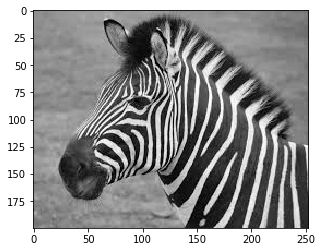

In [4]:
zebra = imread('zebra.jpeg',mode='F')

plt.imshow(zebra, cmap="gray")
plt.show()


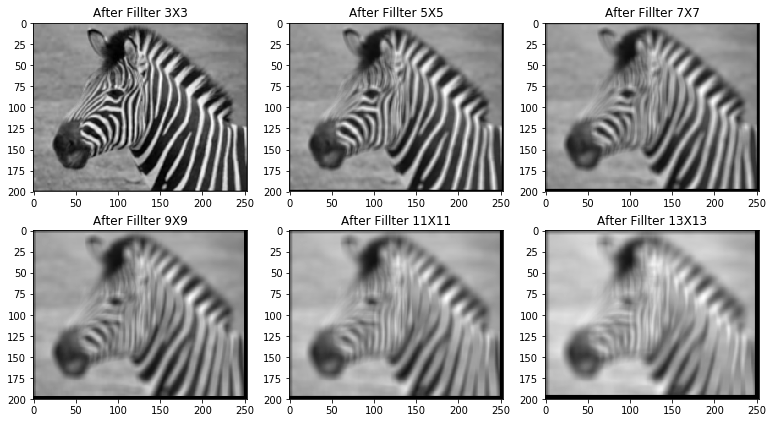

In [5]:
# your code..
plt.figure(figsize=(13,7))
pltNumber = 1
for i in range(3,15,2):
    plt.subplot(2,3,pltNumber)
    zebraFillter =  filter2D(zebra, np.ones((i,i)))
    plt.imshow(zebraFillter , cmap="gray")
    plt.title('After Fillter {}X{}'.format(i,i))
    pltNumber = pltNumber + 1
plt.show()


### Different filters

Apply each of the following 6 filters to the zebra image and display the result. 



In [6]:
f1 = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])
              
f2 = np.array([[0,0,0],
              [0,0,1],
              [0,0,0]])  
              
f3 = np.array([[1,1,1],
              [1,1,1],
              [1,1,1]])               

f4 = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])

f5 = np.array([[1,2,1],
              [0,0,0],
              [-1,-2,-1]])

f6 = np.array([[0,1,0],
              [1,-4,1],
              [0,1,0]])

filters = [f1,f2,f3,f4,f5,f6]




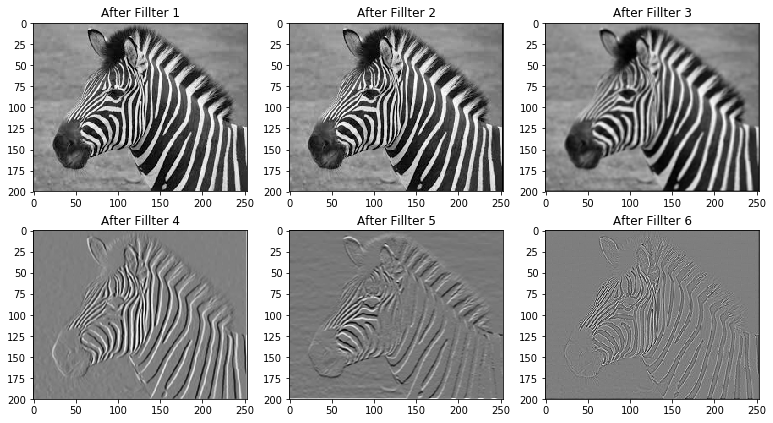

In [7]:
# your code..
plt.figure(figsize=(13,7))
pltNumber = 1
for i,fillter in enumerate(filters):
    plt.subplot(2,3,pltNumber)
    zebraFillter =  filter2D(zebra, fillter)
    plt.imshow(zebraFillter , cmap="gray")
    plt.title('After Fillter {}'.format(i+1))
    pltNumber = pltNumber + 1
plt.show()

Apply the same 6 filters to the following rectangle image:


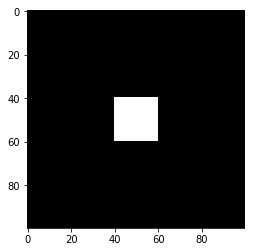

In [8]:
rect = np.zeros((100,100))
rect[40:60,40:60]=1
plt.imshow(rect, cmap="gray")
plt.show()

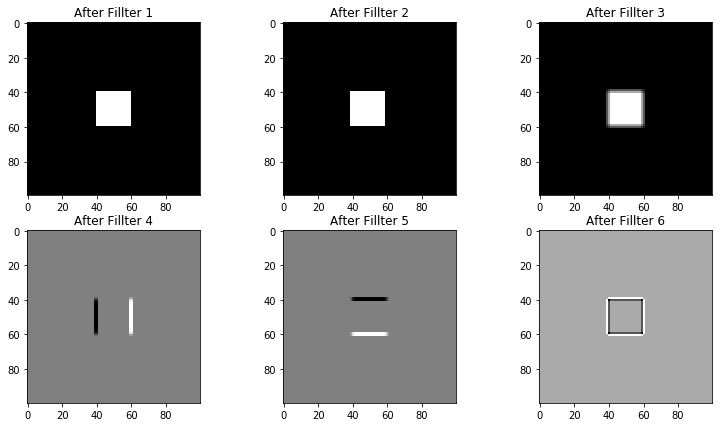

In [9]:
# your code..
plt.figure(figsize=(13,7))
pltNumber = 1
for i,fillter in enumerate(filters):
    plt.subplot(2,3,pltNumber)
    zebraFillter =  filter2D(rect, fillter)
    plt.imshow(zebraFillter , cmap="gray")
    plt.title('After Fillter {}'.format(i+1))
    pltNumber = pltNumber + 1
plt.show()

Write in your own words (hebrew/english) the effect of each of these filters:

- f1: אין שינוי בתמונה

- f2: מסיט מעט לשמאל את המלבן האמצעי

- f3: מטשטש את המלבן האמצעי

- f4: מסלק את המלבן ומשאיר תמונה אפורה עם קצה שחור וקצה לבן מהמלבן כאשר הקצה השמאלי שחור והימני לבן

- f5: מסלק את המלבן ומשאיר תמונה אפורה עם קצה שחור וקצה לבן מהמלבן כאשר הקצה העליון שחור והתחתון לבן

- f6: הופך את הרקע לאפור ומשאיר רק את הקצוות של המלבן עם פס פנימי שחור ופס חיצוני לבן



##  Binary morphology - Dilation & Erosion

Recall the definition of the 'dilation' and 'erosion' methods. 

Instead of using the logical operations (AND in erosion, OR in dilation) we can implement these methods by:

1. filter the (binary) image with a (binary) kernel
2. threshold the result with a specfic level

Implement the 'erosion' and 'dilation' functions using your 'filter2D' function. Assume the input image and the kernel are binary matrices ('0's and '1's). 

In [10]:
def erosion(binary_img, kernel):
    filtered_img = filter2D(binary_img, kernel)
    
    # your code here...   
    thrshold = kernel.sum()
    output_img = filtered_img >= thrshold
    return output_img # should be binary as well




def dilation(binary_img, kernel):
    filtered_img = filter2D(binary_img, kernel)
    # your code here...    
    output_img = filtered_img >= 1
    return output_img # should be binary as well

- Display the results of applying each of these morphological operations to the following "J" image. Use a uniform $5\times 5$ kernel.

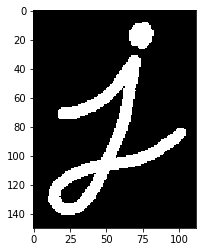

In [11]:
J = imread('j.png','L')
J = J / J.max() 
plt.imshow(J, cmap="gray")
plt.show()

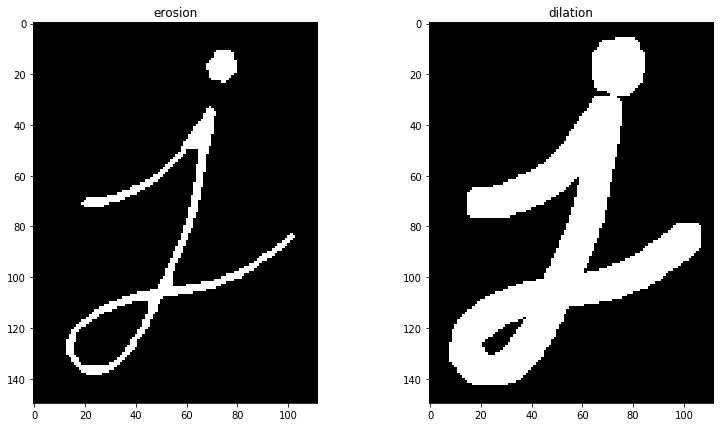

In [12]:
# your code..
plt.figure(figsize=(13,7))
erosionr = erosion(J,np.ones((5,5)))
plt.subplot(1,2,1)
plt.imshow(erosionr, cmap="gray")
plt.title('erosion')

plt.subplot(1,2,2)
dilationr = dilation(J,np.ones((5,5)))
plt.imshow(dilationr, cmap="gray")
plt.title('dilation')
plt.show()


## Binary morphology - Opening & Closing

"Opening" is just another name of erosion followed by dilation. It is useful in removing noise.

Apply "opening" on the noisy image below, and display the result:

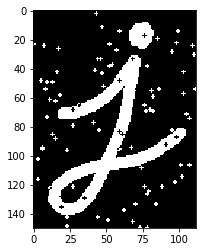

In [13]:
J = imread('j_noise.png','L')
J = J / J.max() 
plt.imshow(J, cmap="gray")
plt.show()

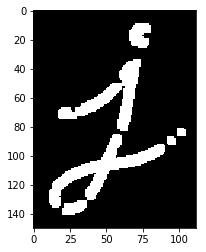

In [14]:
# your code..
er = erosion(J,np.ones((5,5)))
opened = dilation(er,np.ones((5,5)))
plt.imshow(opened, cmap="gray")
plt.show()

"Closing" is reverse of Opening: Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

Apply "closing" on the reult of your last manipulation.

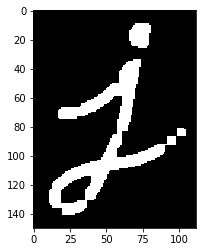

In [15]:
# your code..
r = dilation(opened,np.ones((5,5)))
result_two = erosion(r,np.ones((5,5)))
plt.imshow(result_two, cmap="gray")
plt.show()

## Good Luck!